In [1]:
import os
from glob import glob
import copy 

In [2]:
#from dask import delayed
#from dask import compute
#from dask.distributed import Client, progress
#client = Client(threads_per_worker=4, n_workers=20)

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from root_pandas import read_root 
from ROOT import TFile

Welcome to JupyROOT 6.16/00


/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.3 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [4]:
'''
from guppy import hpy
h = hpy()
print(h.heap())
''';

In [5]:
from Common.CommonHelper  import CommonHelper
from Config.ConfigManager import ConfigManager
from Samples.DataSample   import DataSample
from Samples.DataFile     import DataFile
from Samples.Event        import Event
from Samples.DataFile     import DataFile
from Samples.DataEras     import DataEras
from Samples.ConfigData   import ConfigData
from Cuts.Cuts            import Cuts
from Plotter.Histo        import Histo
from Plotter.HistoVarEff     import HistoVarEff
from Plotter.HistoSampleEff  import HistoSampleEff
from Plotter.HistoEras    import HistoEras

In [6]:
def getCSVPath(path):    
    return glob(os.path.join(path,"*[.csv]*"))
def getCSVFromPath(path):    
    return path.split("/")[-1]


def getSamplesPath(path):
    #return glob(os.path.join(path,"*[!.][!s][!h]"))
    #directory = ['ProbeIDPass','ProbeIsConv','ProbeISOPass','ProbeSigPass','ProbeWorstPass']
    directory = ['Electron','Diboson','WJets','DYJets']
    #return glob(os.path.join(path,"*[!.][!r][!o][!o][!t]"))
    return [os.path.join(path,direc) for direc in directory]
def getSampleFromPath(path):
    return path.split("/")[-1]


def getFileFromPath(path):
    return path.split("/")[-1]
def getFiles(path,sample):
    return glob(os.path.join(path,sample,"output*[!v_0]*"))

In [7]:
def isPathEmpty(path,samp):
    file = glob(os.path.join(path, getSampleFromPath(samp),"output*"))
    if file:
        return False
    else:
        return True

In [8]:
HVar = HistoVarEff()
for histo in HVar.initialize(Type="Eff",binfile="bins_efficiency.csv"):
    print(histo.name)
    
    rangeName = {}
    
    var = 'pt'
    rangeName[var] = histo.name.split('_')
    rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+str(rangeName[var][rangeName[var].index(var)+2])+']'
    #print(var,rangeName[var])
    var = 'eta'
    rangeName[var] = histo.name.split('_')
    rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+str(rangeName[var][rangeName[var].index(var)+2])+']'
    print(var,rangeName[var])


dileptonM_Pass_pt_15_20_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_15_20_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_20_35_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_20_35_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_35_50_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_35_50_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_50_90_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_50_90_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_90_150_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_90_150_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_150_1500_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_150_1500_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_15_20_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Fail_pt_15_20_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_20_35_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Fail_pt_20_35_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_35_50_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Fail_pt_35_50_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_50

In [9]:
def FillData(path,HStack):

    for histo in HStack:
        filename = os.path.join(path,histo.name)+'.csv'
        df = pd.read_csv(filename)
        histo.fill(df)
    
    return HStack
    
    
def FillGrid(Sample, HStack, Cut, EffType ,Short=False):    
    for n, file in enumerate(Sample):
        if n > 0 and Short: break;
            
        #print(file)
        for i,iEvent in enumerate(file):

            event = Event(iEvent)
            #event = Event(event[Cut.Pass(event,Region=None)])
            
            #print(iEvent.dileptonM)
            #print(event.value('dileptonM'))
                
            for histo in HStack:
                eventBin = event
                
                
                Eff = histo.variable['extra'].split("_")
                if "Pass" in Eff:
                    eventBin = Event(eventBin[Cut.CutFlag(eventBin,EffType,True)])
                else:
                    eventBin = Event(eventBin[Cut.CutFlag(eventBin,EffType,False)])
                
                
                rangeName = {}

                var = 'pt'
                rangeName[var] = histo.name.split('_')
                rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+ rangeName[var][rangeName[var].index(var)+2]+']'
                rangeName[var] = CommonHelper.Format.ConvertString2Float(rangeName[var])
                #print(var,rangeName[var])
                var = 'eta'
                rangeName[var] = histo.name.split('_')
                rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+ rangeName[var][rangeName[var].index(var)+2]+']'
                rangeName[var] = CommonHelper.Format.ConvertString2Float(rangeName[var])
                
                
                eventBin = Event(eventBin[Cut.CutRange(eventBin,'photonOnePt',rangeName['pt'])])
                eventBin = Event(eventBin[Cut.CutRange(eventBin,'photonOneEta',rangeName['eta'])])
                
                
                histo.fill( eventBin.value(histo.name.split('_')[0]),
                            #eventBin.value('genWeight')*eventBin.value('eventWeight')*Sample.getSF())
                            #eventBin.value('genWeight')*Sample.getSF())
                          )

    return HStack

In [10]:
Manager = ConfigManager()
datapath     = "/home/jcordero/CMS/data/"
histsavepath = "/home/jcordero/CMS/SMP_ZGamma/histo/"
figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
Manager.CreateProject(histsavepath)
Manager.CreateProject(figpath)

#Type = None
Type = "Eff"

if Type is None:
    binfile = "bins.csv"
else:
    binfile = "bins_efficiency.csv"

PhotonRadiation = None
OppositeCharge = True
#VetoDY = True
#VetoDY = False #right veto settings
VetoDY = None

EffType = "ProbeIDPass"
#EffType = "ProbeISOPass"
#EffType = "ProbeWorstPass"
#EffType = "ProbeSigPass"
#EffType = "ProbeIsConv"

Cut = Cuts(PhotonRadiation = PhotonRadiation, OppositeCharge = OppositeCharge, VetoDY = VetoDY)

#selection = "mumug"
#selection = "elelg"
selection = "ee"

#chuncksize = 5000
chuncksize = 10000
#chuncksize = 1000


#Short = True
Short = False

#fromRoot = True
fromRoot = False

#eras = ['2016','2017','2018']
#eras = ['2017','2018']
eras = ['2018']
#eras = ['2016']
#eras = ['2017']
#eras = ['2018']

DEra = DataEras()
HEra = HistoEras(name = "AllEras")
HUnmergeEra = HistoEras()
for era in eras:
    histsavepath = "/home/jcordero/CMS/SMP_ZGamma/histo/"
    figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
    
    #DATE = Manager.Date()
    DATE = '20200706'
    dirstructure = os.path.join(era,selection,DATE)
    
    print('Loading era {} for selection {}'.format(era,selection))
    path = datapath+"data_{}/{}/SMP_ZG/Files/{}/{}/".format(era,Manager.legacy(era),selection,Manager.latestDir(era,selection))
    #histsavepath = os.path.join(histsavepath,dirstructure)
    #figpath = os.path.join(figpath,dirstructure)
    histsavepath = os.path.join(histsavepath,dirstructure,EffType)
    figpath = os.path.join(figpath,dirstructure,EffType)
    
    Manager.CreateFigStructure(figpath)
    

    if fromRoot:
        print('---Building data files')
        DSample = DataSample()
        for samp in getSamplesPath(path):
            if not isPathEmpty(path,samp) :
                DSample.append( DataFile(path, getSampleFromPath(samp), era, chuncksize) )
        DEra.append(DSample)

        Samples = DSample.getSamples()
    else:
        Samples = [getSampleFromPath(samp) for samp in getSamplesPath(histsavepath)]
        
    #Samples = ['ZGToLLG','DYJets']
    #Samples = ['ZGToLLG']
    #Samples = ['TTTo2L2Nu','WJets']

    print('---Filling in histograms')
    HSample = HistoSampleEff()
    for sample in Samples:
        print(sample)
        HVar = HistoVarEff()
        if fromRoot:
            HSample.append(FillGrid(DSample[sample], 
                                    HVar.initialize(Type=Type,binfile=binfile), 
                                    Cut,
                                    EffType,
                                    Short=Short), 
                           sample)
        else:
            
            HSample.append(FillData(os.path.join(histsavepath,sample),
                                    HVar.initialize(Type=Type,binfile=binfile),
                                   ),
                          sample)
    
    HUnmergeSmaple = copy.deepcopy(HSample)
    if fromRoot:
        if selection == "mumug":
            HSample.merge(ConfigData().DoubleMuon(era),name ="DoubleMuon")
            HSample.merge(ConfigData().Diboson(era),name ="Diboson")
        elif selection == "elelg":
            HSample.merge(ConfigData().DoubleEG(era),name ="DoubleEG")
            HSample.merge(ConfigData().Diboson(era),name ="Diboson")
        elif selection == "ee":
            HSample.merge(ConfigData().Electron(era),name ="Electron")
            HSample.merge(ConfigData().Diboson(era),name ="Diboson")

    
    HEra.append(HSample, name = era)
    HUnmergeEra.append(HUnmergeSmaple, name = era)

if len(eras) > 1:
    dirstructure = os.path.join(HEra.name,selection,DATE)
    path = datapath+"data_{}/{}/SMP_ZG/Files/{}/{}/".format(HEra.name,Manager.legacy(era),selection,Manager.latestDir(era,selection))
    figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
    #figpath = os.path.join(figpath,dirstructure)
    figpath = os.path.join(figpath,dirstructure,EffType)
    Manager.CreateFigStructure(figpath)
else:
    dirstructure = os.path.join(eras[0],selection,DATE)
    path = datapath+"data_{}/{}/SMP_ZG/Files/{}/{}/".format(eras[0],Manager.legacy(eras[0]),selection,Manager.latestDir(eras[0],selection))
    figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
    #figpath = os.path.join(figpath,dirstructure)
    figpath = os.path.join(figpath,dirstructure,EffType)
    Manager.CreateFigStructure(figpath)

Loading era 2018 for selection ee
---Filling in histograms
Electron
Diboson
WJets
DYJets


In [11]:
if fromRoot:
    HEra['2018'].savehists(histsavepath)

Electron
dileptonM_Pass_pt_15_20_eta_0_1.4442
0     11448
1     11207
2     10587
3     10071
4      9429
5      9113
6      8719
7      8886
8      9233
9     10390
10    12785
11    16600
12    22688
13    30444
14    35643
15    29377
16    16939
17     8469
18     4755
19     3234
20     2463
21     3072
22     3854
23     2953
24     2403
Name: values, dtype: int64
dileptonM_Pass_pt_15_20_eta_1.566_2.5
0     2729.0
1     2685.0
2     2517.0
3     2208.0
4     2133.0
5     2051.0
6     2032.0
7     2173.0
8     2430.0
9     2879.0
10    3968.0
11    5326.0
12    7269.0
13    8595.0
14    8905.0
15    7114.0
16    4601.0
17    2657.0
18    1491.0
19    1091.0
20     713.0
21     923.0
22    1141.0
23     922.0
24     810.0
Name: values, dtype: float64
dileptonM_Pass_pt_20_35_eta_0_1.4442
0      16461.0
1      20437.0
2      24554.0
3      28261.0
4      31525.0
5      35168.0
6      38710.0
7      44399.0
8      50923.0
9      62059.0
10     81504.0
11    117693.0
12    186713.0
13 

dileptonM_Pass_pt_15_20_eta_0_1.4442
0      5663.0
1      5426.0
2      5158.0
3      5076.0
4      5068.0
5      5151.0
6      5281.0
7      5757.0
8      6647.0
9      8093.0
10    11268.0
11    17176.0
12    26991.0
13    40428.0
14    49738.0
15    42856.0
16    23544.0
17    10770.0
18     5071.0
19     2764.0
20     1767.0
21     1680.0
22     1730.0
23     1096.0
24      784.0
Name: values, dtype: float64
dileptonM_Pass_pt_15_20_eta_1.566_2.5
0     1004.0
1      985.0
2      980.0
3     1010.0
4      955.0
5      993.0
6     1088.0
7     1121.0
8     1394.0
9     1668.0
10    2477.0
11    3747.0
12    5455.0
13    7287.0
14    8219.0
15    7586.0
16    5020.0
17    2922.0
18    1505.0
19     904.0
20     532.0
21     458.0
22     457.0
23     301.0
24     204.0
Name: values, dtype: float64


/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


dileptonM_Pass_pt_20_35_eta_0_1.4442
0      11259.0
1      13639.0
2      15849.0
3      17667.0
4      19121.0
5      20666.0
6      22224.0
7      24487.0
8      26913.0
9      31622.0
10     40926.0
11     60809.0
12    104246.0
13    181948.0
14    270227.0
15    271704.0
16    134334.0
17     55642.0
18     25525.0
19     14196.0
20      9267.0
21      9393.0
22      9718.0
23      5993.0
24      4292.0
Name: values, dtype: float64
dileptonM_Pass_pt_20_35_eta_1.566_2.5
0      2072.0
1      2510.0
2      2818.0
3      3144.0
4      3456.0
5      3646.0
6      3966.0
7      4109.0
8      4753.0
9      5610.0
10     7353.0
11    11176.0
12    18509.0
13    28951.0
14    37750.0
15    44380.0
16    31799.0
17    16541.0
18     7939.0
19     4139.0
20     2619.0
21     2465.0
22     2656.0
23     1663.0
24     1192.0
Name: values, dtype: float64
dileptonM_Pass_pt_35_50_eta_0_1.4442
0       1654.0
1       2041.0
2       2570.0
3       3523.0
4       4760.0
5       6868.0
6       9239.0


dileptonM_Pass_pt_15_20_eta_1.566_2.5
0     12
1      8
2     18
3      9
4     23
5     12
6     12
7     11
8      6
9      9
10    13
11    12
12    15
13    13
14     7
15     8
16     6
17     8
18     4
19     4
20     6
21     8
22    10
23     7
24     3
Name: values, dtype: int64
dileptonM_Pass_pt_20_35_eta_0_1.4442
0     49
1     68
2     59
3     75
4     84
5     81
6     75
7     81
8     84
9     85
10    78
11    70
12    70
13    59
14    85
15    79
16    61
17    53
18    45
19    44
20    33
21    59
22    79
23    68
24    66
Name: values, dtype: int64
dileptonM_Pass_pt_20_35_eta_1.566_2.5
0     17
1     14
2     12
3     19
4     14
5     18
6     19
7     15
8     14
9     20
10    10
11    15
12     7
13     9
14    15
15    13
16     4
17    15
18    13
19     4
20    14
21    13
22    27
23    13
24    14
Name: values, dtype: int64
dileptonM_Pass_pt_35_50_eta_0_1.4442
0      7
1      5
2     10
3      8
4      4
5      9
6      7
7     12
8     18
9     16
10  

dileptonM_Pass_pt_35_50_eta_0_1.4442
0        414
1        523
2        706
3       1201
4       1916
5       3098
6       5056
7       7763
8      12065
9      19068
10     31276
11     56782
12    112037
13    231064
14    406330
15    471854
16    186510
17     71795
18     32327
19     17969
20     11198
21     10320
22      9282
23      5354
24      3141
Name: values, dtype: int64
dileptonM_Pass_pt_35_50_eta_1.566_2.5
0        78
1        87
2       113
3       207
4       361
5       553
6       894
7      1384
8      2122
9      3306
10     5448
11     9649
12    18949
13    35672
14    54808
15    80636
16    52454
17    25885
18    11614
19     5595
20     3232
21     3060
22     2901
23     1644
24     1038
Name: values, dtype: int64
dileptonM_Pass_pt_50_90_eta_0_1.4442
0        201
1        255
2        257
3        321
4        384
5        475
6        612
7        878
8       1264
9       2178
10      4027
11      7803
12     18010
13     44609
14     95839
15    132570
1

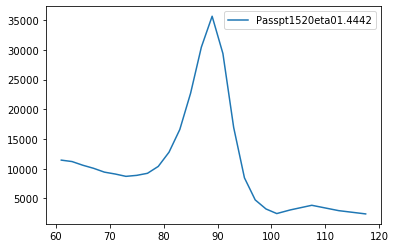

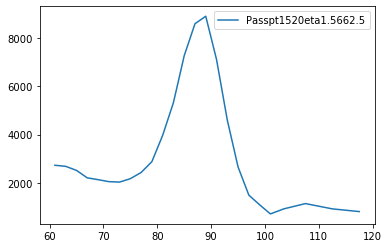

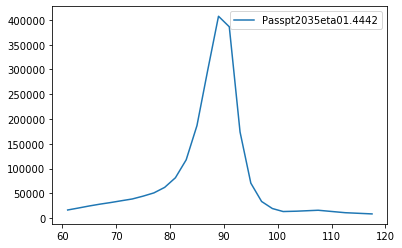

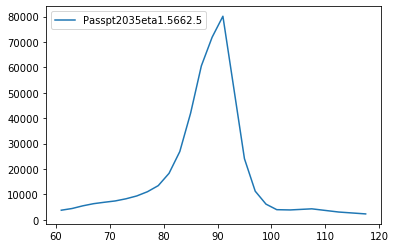

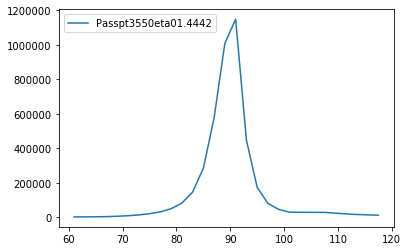

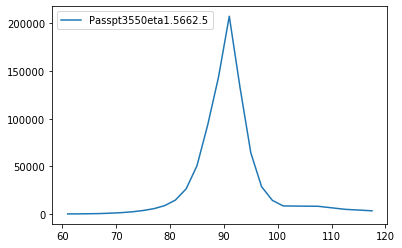

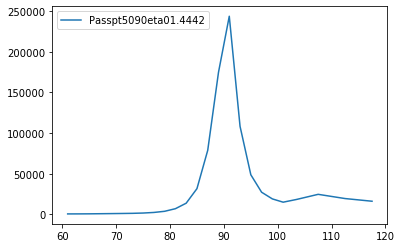

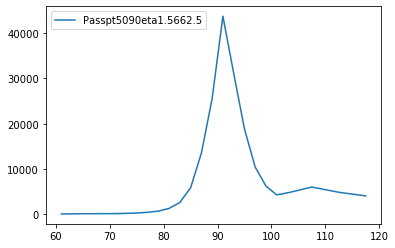

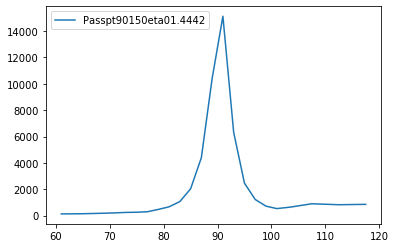

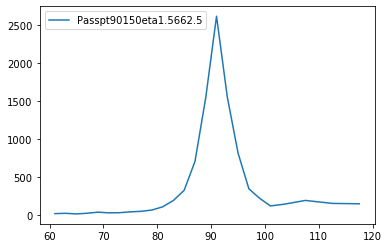

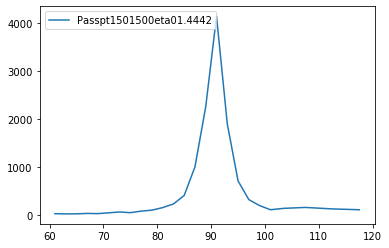

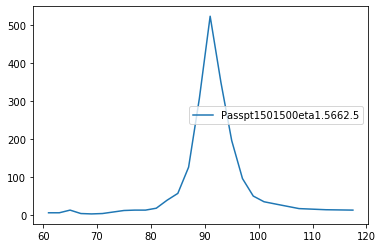

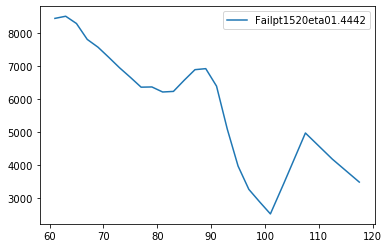

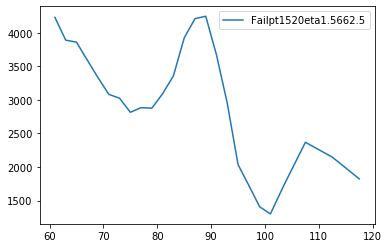

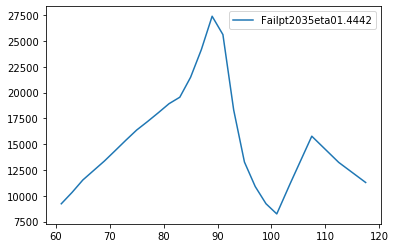

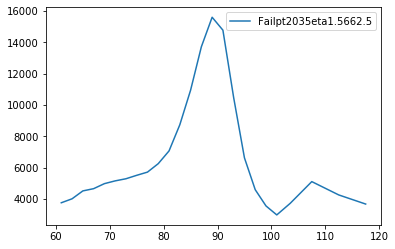

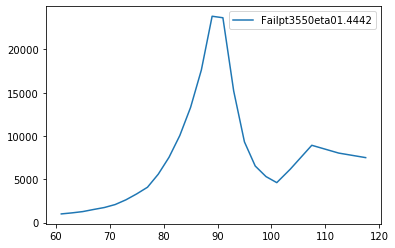

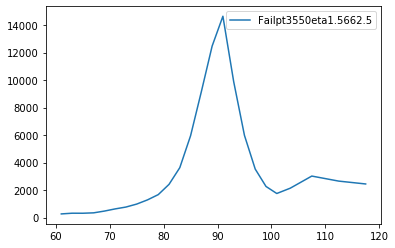

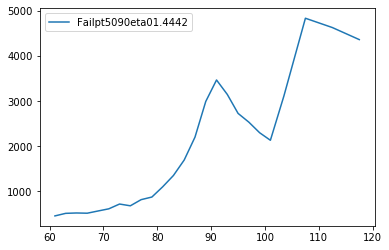

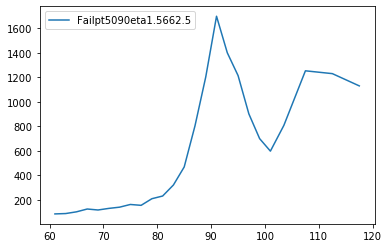

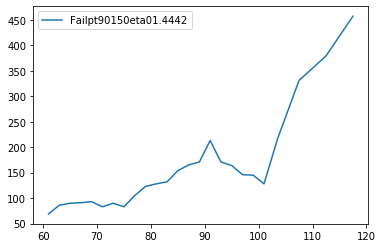

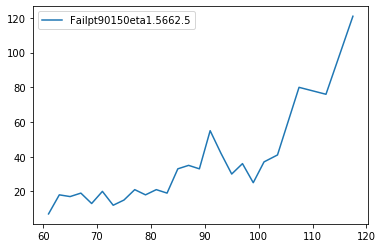

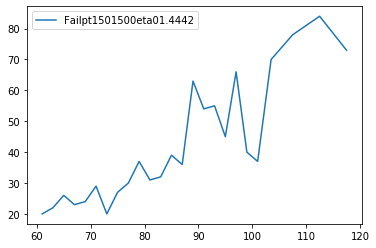

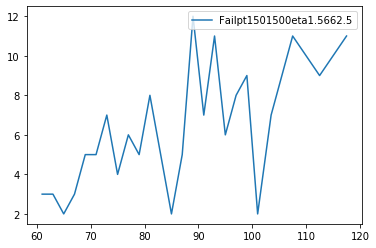

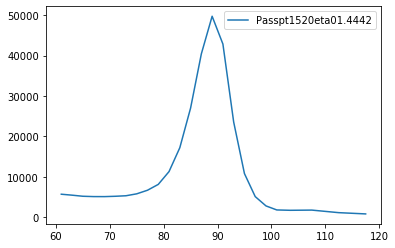

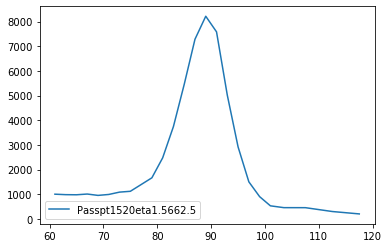

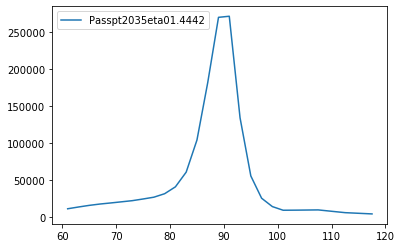

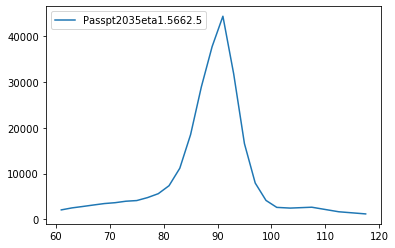

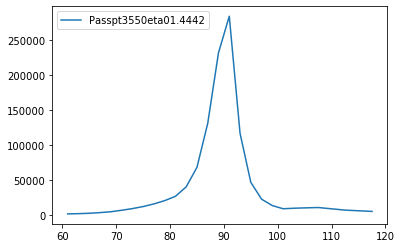

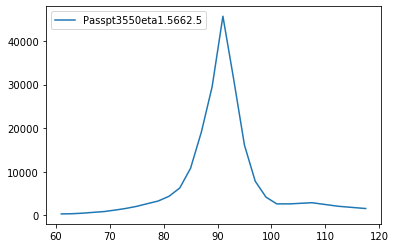

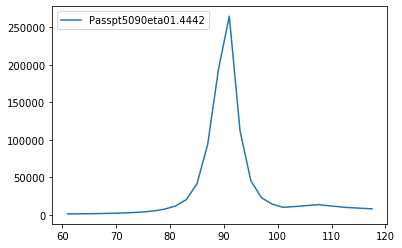

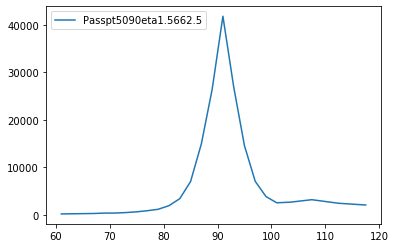

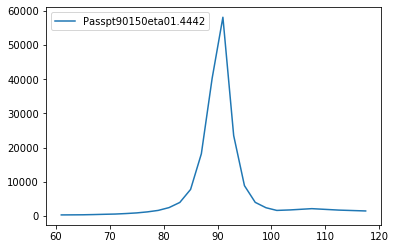

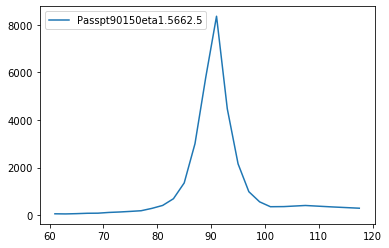

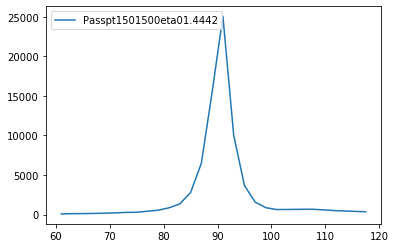

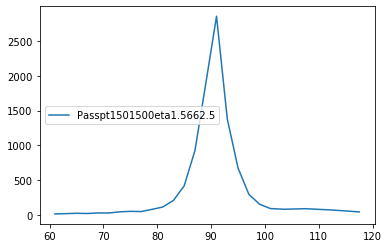

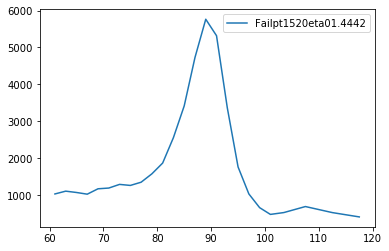

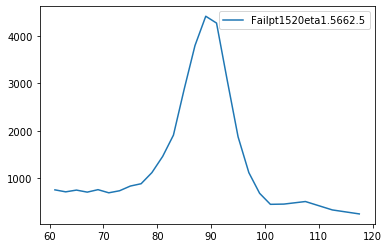

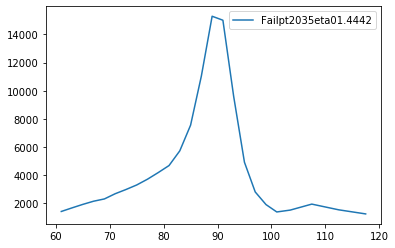

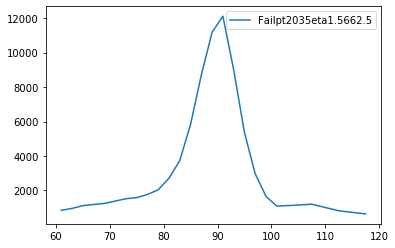

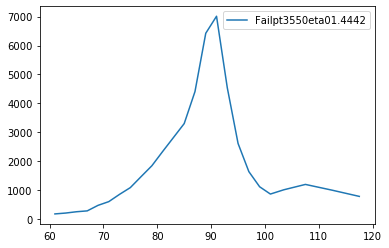

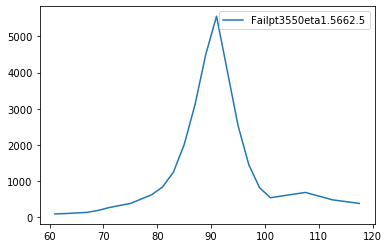

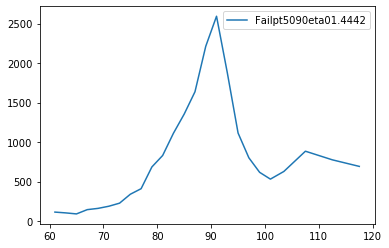

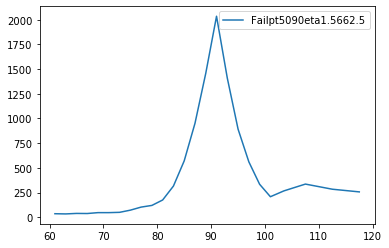

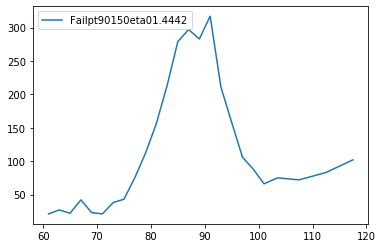

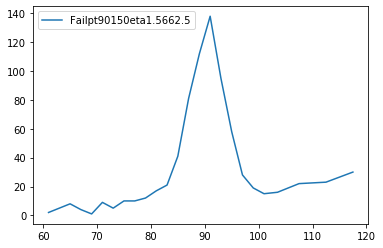

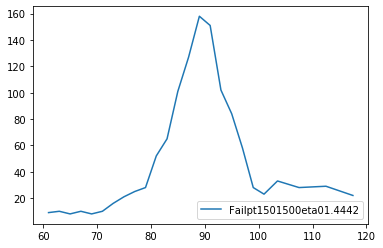

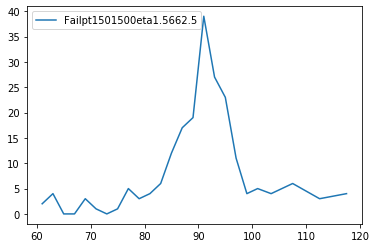

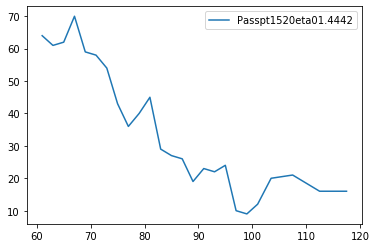

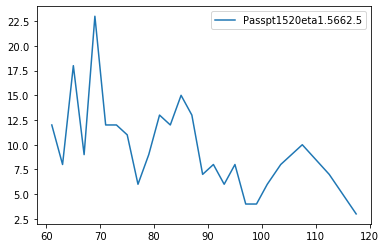

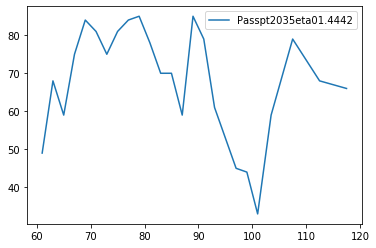

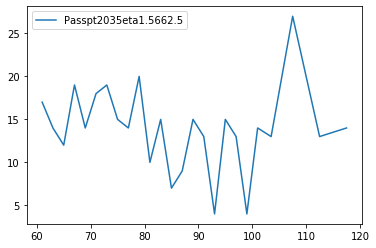

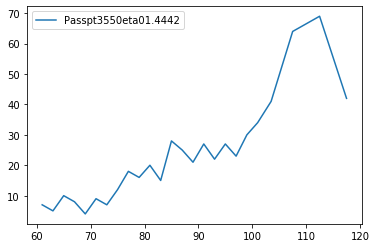

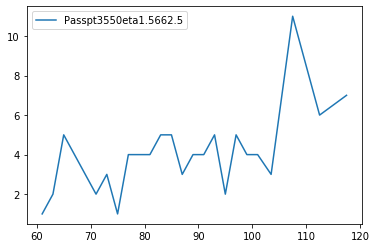

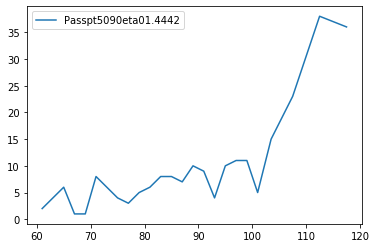

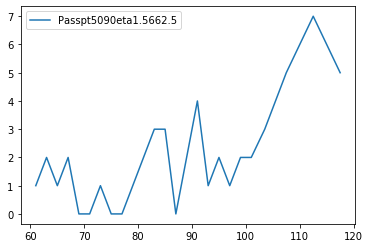

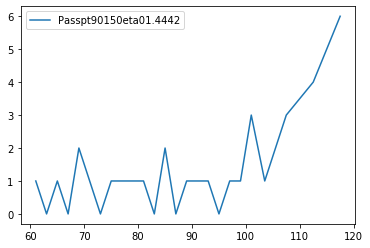

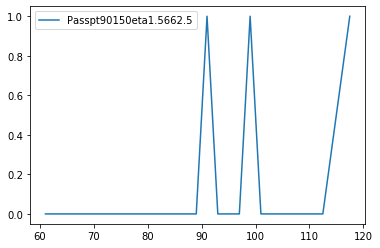

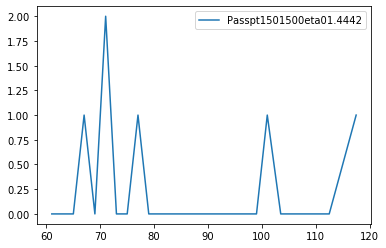

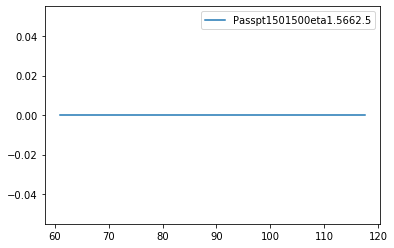

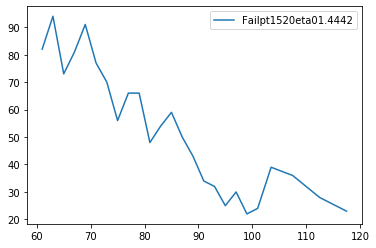

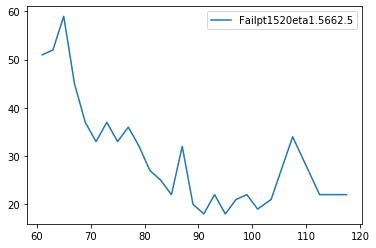

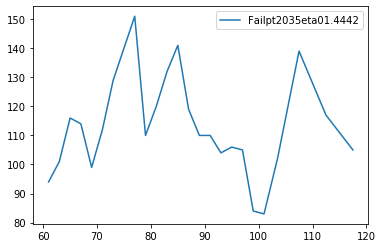

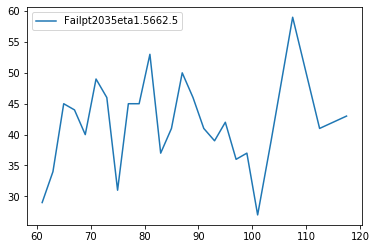

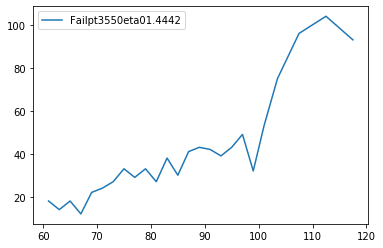

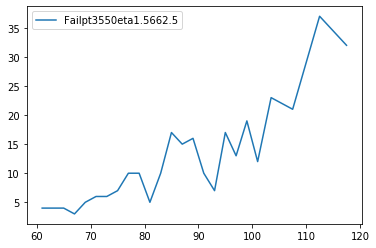

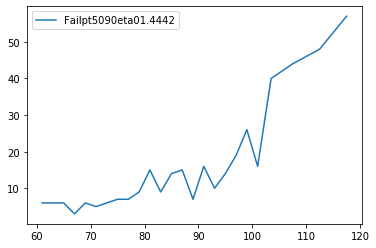

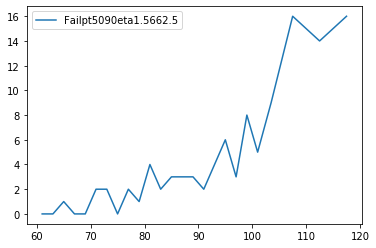

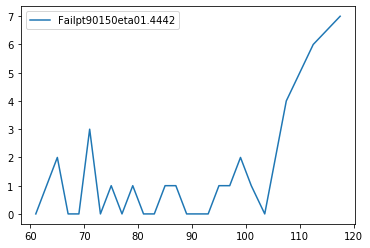

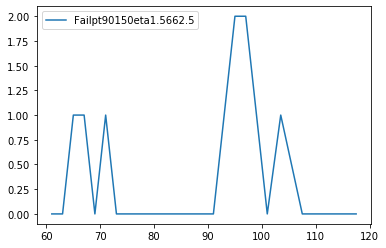

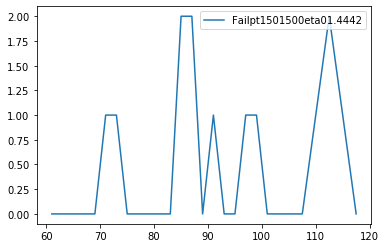

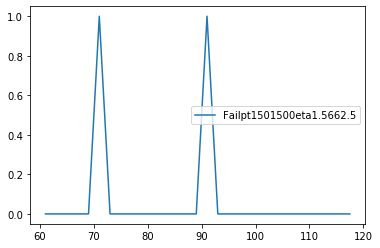

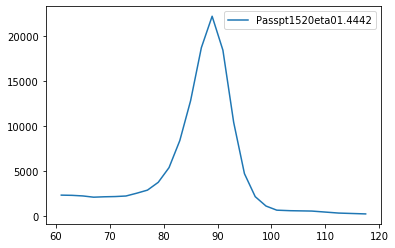

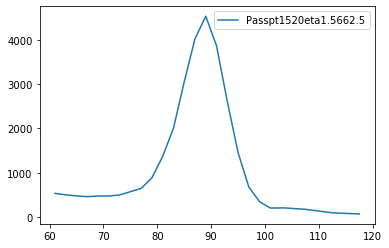

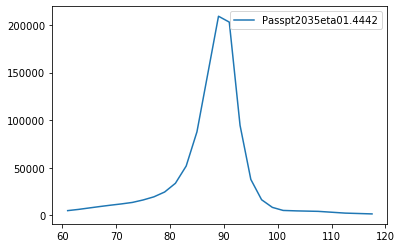

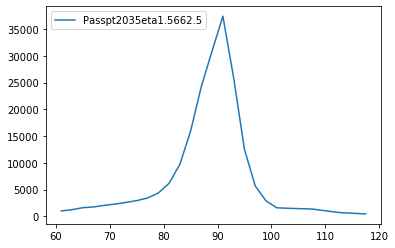

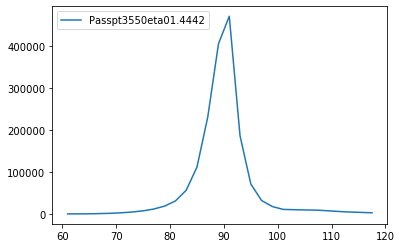

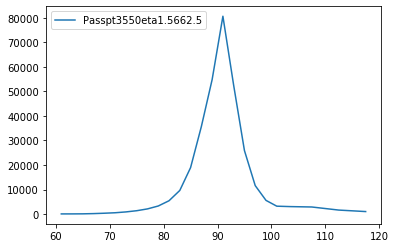

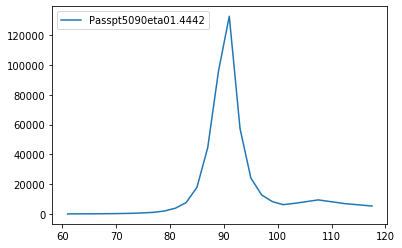

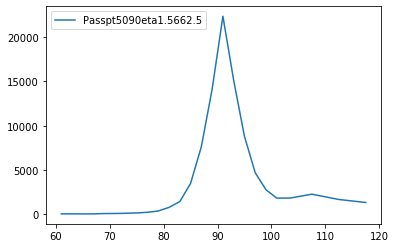

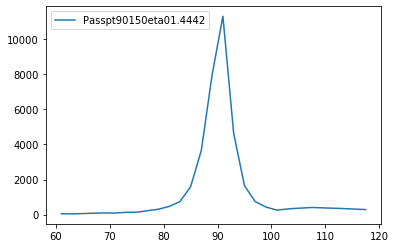

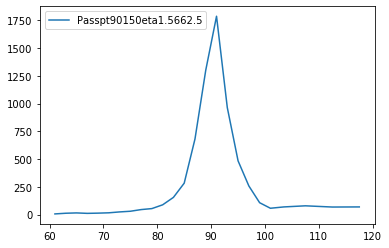

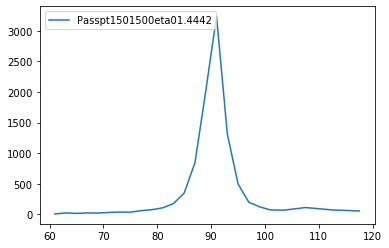

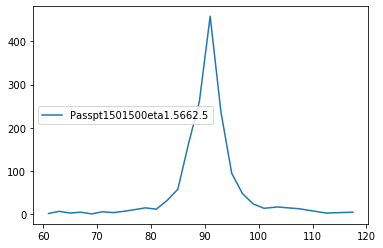

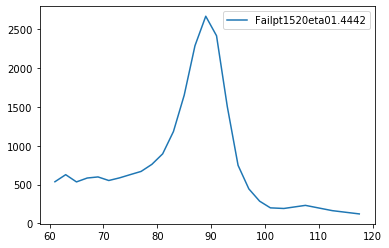

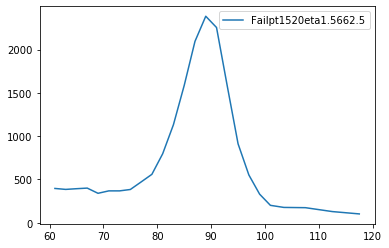

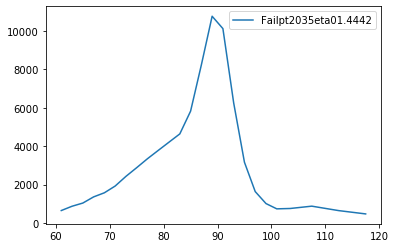

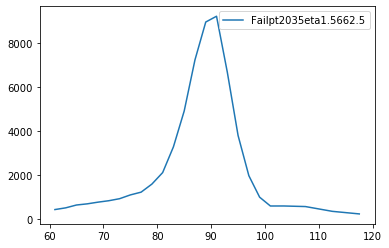

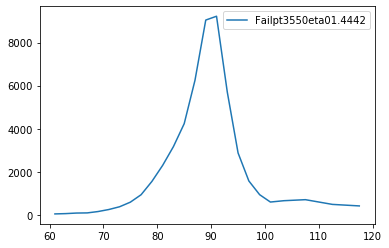

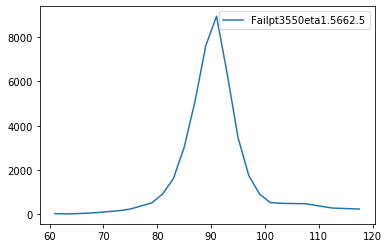

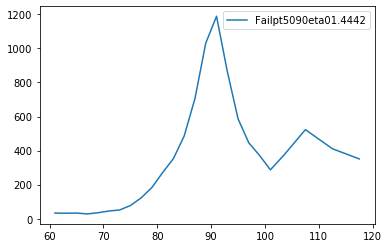

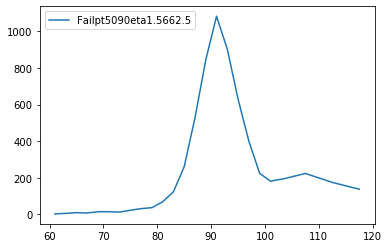

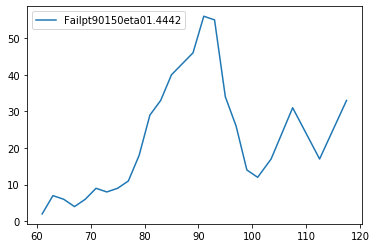

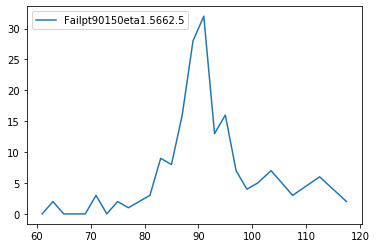

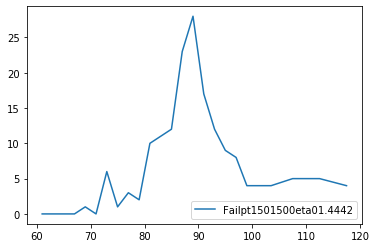

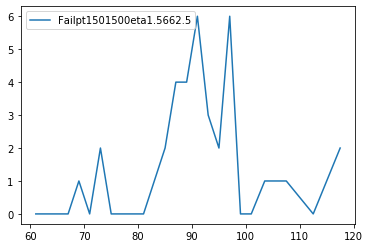

In [12]:
#HEra[0][0].plot(variable='dileptonM')
#for h in HSample['Electron']:
    #print(h.name)
    #print(h.variable)
    #print(h.bins)
    #h.plot()
#plt.figure()

for HS in HEra['2018']:
    print(HS.name)

    for h in HS:
        plt.figure()
        ax = plt.gca()
        
        variable=h.name
        print(variable)
        #print(h.bins)
        print(h.values)

        #plt.hist(CommonHelper.Plot.BinFormat(Bins=h.bins,Type="center"),
        #         weights=h.values)

        ax.plot(CommonHelper.Plot.BinFormat(Bins=h.bins,Type="center"),
                 h.values,
                 label = "".join(h.variable['extra'].split('_')))
    

        ax.legend()

#h.plot()
#Sample['Electron'].plot(variable)

--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail


/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:231: RuntimeWarning: overflow encountered in exp
  u = np.exp(-u)
/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:233: RuntimeWarning: invalid value encountered in multiply
  u[u > 70]  = u[u > 70]*0
/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:234: RuntimeWarning: invalid value encountered in greater_equal
  ind  =  np.logical_and(u>=-70, u<=70)
/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:234: RuntimeWarning: invalid value encountered in less_equal
  ind  =  np.logical_and(u>=-70, u<=70)


--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail


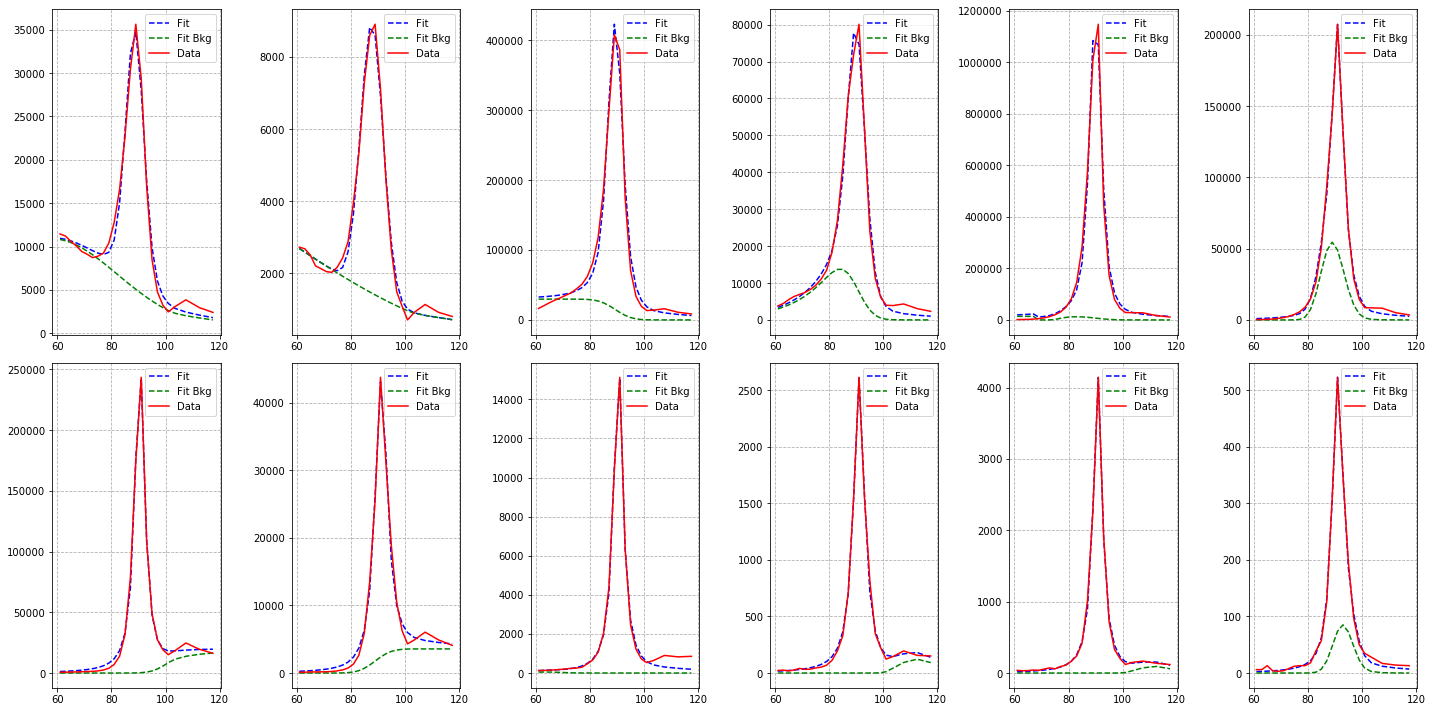

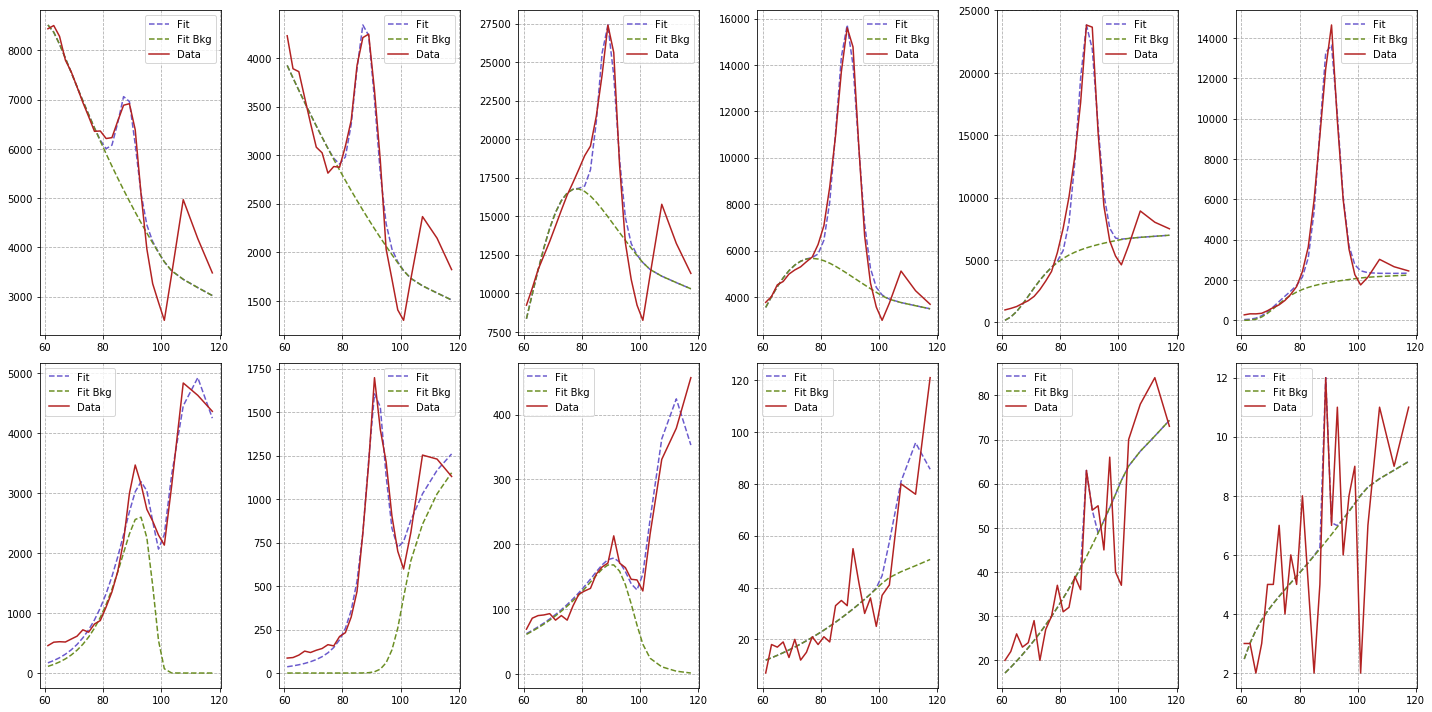

In [13]:
HEra['2018'].GetYieldData(EffType=EffType,figsize = (20,10));

In [14]:
HEra['2018'].GetYieldMC();

In [15]:
#HEra['2018'].FitRes
#HEra['2018']['Electron']['dileptonM_Pass_pt_[15, 20]_eta_[0, 1.4442]'].values
print(histsavepath)
print(type(HEra['2018']),HEra['2018'].name)
print(type(HEra['2018']['Electron']),HEra['2018']['Electron'].name)
#print(HEra['2018']['Electron'].names)
#print(HEra['2018']['Electron']['dileptonM_Pass_pt_[15, 20]_eta_[0, 1.4442]'].names)


#HEra['2018'][]

/home/jcordero/CMS/SMP_ZGamma/histo/2018/ee/20200706/ProbeIDPass
<class 'Plotter.HistoSampleEff.HistoSampleEff'> 2018
<class 'Plotter.HistoVarEff.HistoVarEff'> Electron


--- Plotting Pass
--- Plotting Fail


([10000.0, 1000.0, 1, 2, 13, 17, 0.1, 20, 1],
 [100.0, 1500.0, 1, 1, 42, 47, 0.01, 20, 1],
 [12391.333200361121,
  263.03317510134593,
  0.0654216379685682,
  0.9896069822599485,
  14.900075306917236,
  54.40385239034795,
  0.2968799540418197,
  -24.05364589765668,
  -0.08841000349371553],
 [27.42150114087849,
  1029.4907015889753,
  0.3112430536681751,
  2.1847373393724112e-07,
  39.43686872407692,
  69.99999978912304,
  0.025625378190684722,
  395.8751163035631,
  0.04606812384794978])

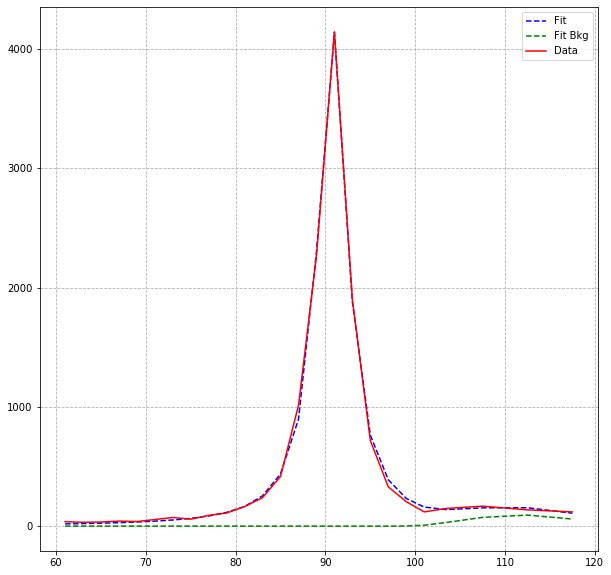

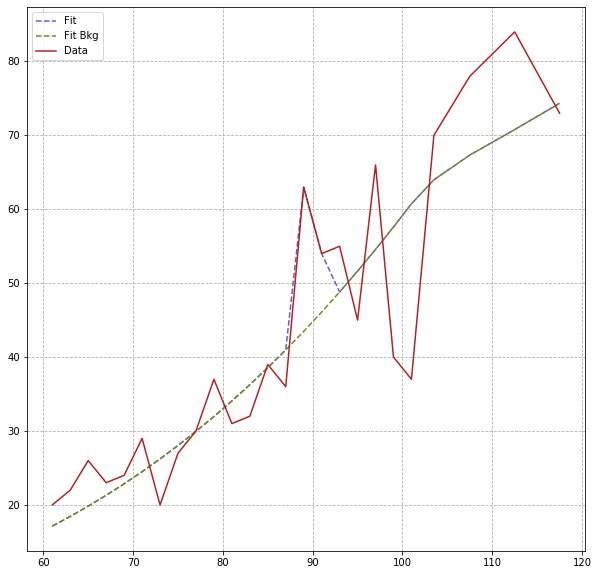

In [16]:
fig1= plt.figure(1,figsize = (10,10))
fig2= plt.figure(2,figsize = (10,10))

ax1 = fig1.gca()
ax2 = fig2.gca()
HEra['2018'].GetYieldOneData(10,ax1,ax2,EffType=EffType)

In [17]:
HEra['2018'].Yield['Electron']['Fail']['[15, 20]']['[1.566, 2.5]']

8447.843908003793

In [18]:
HEra['2018'].Yield['Electron']['Pass']['[15, 20]']['[1.566, 2.5]']

38827.66498783163

In [19]:
HEra['2018'].eff

{'Electron': {'[15, 20]': {'[0, 1.4442]': 0.9476361174156872,
   '[1.566, 2.5]': 0.8213061243482885},
  '[20, 35]': {'[0, 1.4442]': 0.9748217194439256,
   '[1.566, 2.5]': 0.8751912854012615},
  '[35, 50]': {'[0, 1.4442]': 0.98294373446714,
   '[1.566, 2.5]': 0.9111365819875159},
  '[50, 90]': {'[0, 1.4442]': 0.9689649902272349,
   '[1.566, 2.5]': 0.9371816000361217},
  '[90, 150]': {'[0, 1.4442]': 0.967625836615274,
   '[1.566, 2.5]': 0.985832337977803},
  '[150, 1500]': {'[0, 1.4442]': 0.9977919282730046,
   '[1.566, 2.5]': 0.9960008696808722}},
 'Diboson': {'[15, 20]': {'[0, 1.4442]': 0.8671354367233913,
   '[1.566, 2.5]': 0.622118782495436},
  '[20, 35]': {'[0, 1.4442]': 0.9257591939094086,
   '[1.566, 2.5]': 0.7571377714489143},
  '[35, 50]': {'[0, 1.4442]': 0.958140849564397,
   '[1.566, 2.5]': 0.8639885877809957},
  '[50, 90]': {'[0, 1.4442]': 0.9780865137734454,
   '[1.566, 2.5]': 0.939635166955091},
  '[90, 150]': {'[0, 1.4442]': 0.9844138158489683,
   '[1.566, 2.5]': 0.9751288

In [20]:
figpath
#histsavepath

'/home/jcordero/CMS/SMP_ZGamma/fig/2018/ee/20200706/ProbeIDPass'

In [21]:
FIGPATH = histsavepath+"/eff.root"

In [22]:
bins1 = HEra['2018']['Electron'].bins1
bins2 = HEra['2018']['Electron'].bins2

#hist2d = HEra['2018'].EffPlot(figpath=FIGPATH,bins1=bins1,bins2=bins2)

In [23]:
#HEra['2018'].GetYieldData()
#HEra['2018'].getData().name
Pass = HEra['2018'].getData().getPass()

In [24]:
HEra['2018'].effStat

{'Electron': {'[15, 20]': {'[0, 1.4442]': 0.00013916605415888948,
   '[1.566, 2.5]': 0.0001187623897111387},
  '[20, 35]': {'[0, 1.4442]': 1.6187007848216829e-06,
   '[1.566, 2.5]': 9.42504504237698e-06},
  '[35, 50]': {'[0, 1.4442]': 2.170732865703183e-06,
   '[1.566, 2.5]': 4.107069733712824e-05},
  '[50, 90]': {'[0, 1.4442]': 1.478167731074024e-05,
   '[1.566, 2.5]': 1.563387832366997e-05},
  '[90, 150]': {'[0, 1.4442]': 0.00016041213326948493,
   '[1.566, 2.5]': 0.000633756180055452},
  '[150, 1500]': {'[0, 1.4442]': 0.0001286461538604299,
   '[1.566, 2.5]': 0.01221036021006317}},
 'Diboson': {'[15, 20]': {'[0, 1.4442]': 0.0021816061608500516,
   '[1.566, 2.5]': 0.0032823484086421193},
  '[20, 35]': {'[0, 1.4442]': 0.0010851170800002027,
   '[1.566, 2.5]': 0.0019866614783018584},
  '[35, 50]': {'[0, 1.4442]': 0.0012754317138623367,
   '[1.566, 2.5]': 0.0026345211280054347},
  '[50, 90]': {'[0, 1.4442]': 0.0014508272970024905,
   '[1.566, 2.5]': 0.003215742411378897},
  '[90, 150]':

In [25]:
import array
from ROOT import TCanvas,TTree,gStyle,TH2F


fileOut = TFile(FIGPATH,"recreate")
tree = TTree("eff_photon","eff_photon")

gStyle.SetOptStat(0)
#################################################

Bin1 = array.array("f",CommonHelper.Plot.BinFormat(bins1,Type='edges'))
Bin2 = array.array("f",CommonHelper.Plot.BinFormat(bins2,Type='edges'))

HISTO = HEra['2018']

nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
histDraw = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)


nBin1,nBin2 = HISTO.nBin1-1, HISTO.nBin2
hist2d = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
statDraw = TH2F("EGamma_eff_draw_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

nBin1,nBin2 = HISTO.nBin1-1, HISTO.nBin2
stat2d = TH2F("EGamma_eff_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)


#################################################
tree.Branch("eff",hist2d,"TH2F")


for j,binj in zip(range(nBin1),bins1):
    hist2d.GetZaxis().SetRangeUser(0.6,1.1)

    for i,bini in zip(range(nBin2),bins2):
        print(j,i,bini,binj)
        #EFF = self.effMC[str(binj)][str(bini)]
        #EFFStat = self.effMCStat[str(binj)][str(bini)]
        EFF = HISTO.eff['Electron'][str(binj)][str(bini)]
        EFFStat = HISTO.effStat['Electron'][str(binj)][str(bini)]

        hist2d.SetBinContent(int(j)+1, int(i)+1, EFF)
        histDraw.SetBinContent(int(j)+1, int(i)+1, EFF)

        stat2d.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        statDraw.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        tree.Fill()

hist2d.GetZaxis().SetRangeUser(0.6,0.95)
hist2d.Draw("COLZ text")

fileOut.Write()

0 0 [0, 1.4442] [15, 20]
0 1 [1.566, 2.5] [15, 20]
1 0 [0, 1.4442] [20, 35]
1 1 [1.566, 2.5] [20, 35]
2 0 [0, 1.4442] [35, 50]
2 1 [1.566, 2.5] [35, 50]
3 0 [0, 1.4442] [50, 90]
3 1 [1.566, 2.5] [50, 90]
4 0 [0, 1.4442] [90, 150]
4 1 [1.566, 2.5] [90, 150]


1514

Warning in <TFile::Append>: Replacing existing TH1: EGamma_eff (Potential memory leak).
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [26]:
HEra['2018'].eff['Electron']

{'[15, 20]': {'[0, 1.4442]': 0.9476361174156872,
  '[1.566, 2.5]': 0.8213061243482885},
 '[20, 35]': {'[0, 1.4442]': 0.9748217194439256,
  '[1.566, 2.5]': 0.8751912854012615},
 '[35, 50]': {'[0, 1.4442]': 0.98294373446714,
  '[1.566, 2.5]': 0.9111365819875159},
 '[50, 90]': {'[0, 1.4442]': 0.9689649902272349,
  '[1.566, 2.5]': 0.9371816000361217},
 '[90, 150]': {'[0, 1.4442]': 0.967625836615274,
  '[1.566, 2.5]': 0.985832337977803},
 '[150, 1500]': {'[0, 1.4442]': 0.9977919282730046,
  '[1.566, 2.5]': 0.9960008696808722}}

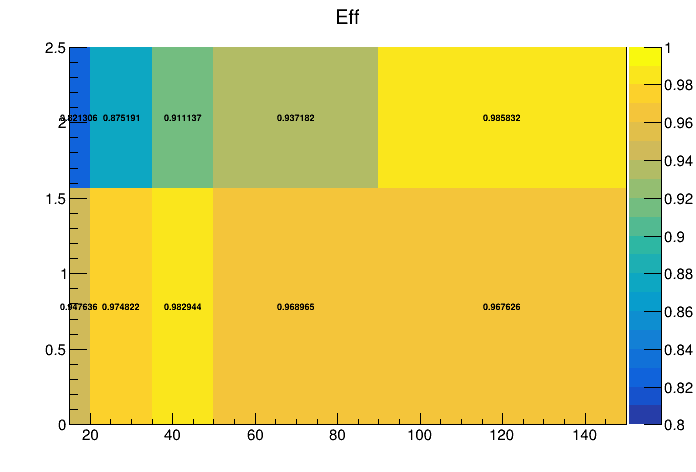

In [27]:
c = TCanvas()
hist2d.GetZaxis().SetRangeUser(0.8,1)
hist2d.Draw("COLZ text")
c.Draw()

In [28]:
import array
from ROOT import TCanvas,TTree,gStyle,TH2F

FIGPATH = histsavepath+"/eff_mc.root"
fileOut = TFile(FIGPATH,"recreate")
tree = TTree("eff_mc_photon","eff_mc_photon")

gStyle.SetOptStat(0)
#################################################

Bin1 = array.array("f",CommonHelper.Plot.BinFormat(bins1,Type='edges'))
Bin2 = array.array("f",CommonHelper.Plot.BinFormat(bins2,Type='edges'))

HISTO = HEra['2018']

nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
histDraw = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)


nBin1,nBin2 = HISTO.nBin1-1, HISTO.nBin2
hist2d = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
statDraw = TH2F("EGamma_eff_draw_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

nBin1,nBin2 = HISTO.nBin1-1, HISTO.nBin2
stat2d = TH2F("EGamma_eff_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)


#################################################
tree.Branch("eff",hist2d,"TH2F")


for j,binj in zip(range(nBin1),bins1):
    hist2d.GetZaxis().SetRangeUser(0.6,1.1)

    for i,bini in zip(range(nBin2),bins2):
        print(j,i,bini,binj)
        #EFF = self.effMC[str(binj)][str(bini)]
        #EFFStat = self.effMCStat[str(binj)][str(bini)]
        EFF = HISTO.eff['DYJets'][str(binj)][str(bini)]
        EFFStat = HISTO.effStat['DYJets'][str(binj)][str(bini)]

        hist2d.SetBinContent(int(j)+1, int(i)+1, EFF)
        histDraw.SetBinContent(int(j)+1, int(i)+1, EFF)

        stat2d.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        statDraw.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        tree.Fill()

hist2d.GetZaxis().SetRangeUser(0.6,0.95)
hist2d.Draw("COLZ text")

fileOut.Write()

0 0 [0, 1.4442] [15, 20]
0 1 [1.566, 2.5] [15, 20]
1 0 [0, 1.4442] [20, 35]
1 1 [1.566, 2.5] [20, 35]
2 0 [0, 1.4442] [35, 50]
2 1 [1.566, 2.5] [35, 50]
3 0 [0, 1.4442] [50, 90]
3 1 [1.566, 2.5] [50, 90]
4 0 [0, 1.4442] [90, 150]
4 1 [1.566, 2.5] [90, 150]


1526

Warning in <TFile::Append>: Replacing existing TH1: EGamma_eff (Potential memory leak).


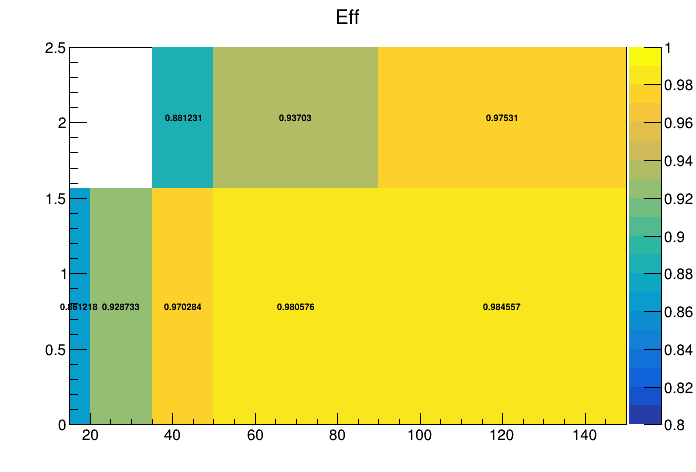

In [29]:
c = TCanvas()
hist2d.GetZaxis().SetRangeUser(0.8,1)
hist2d.Draw("COLZ text")
c.Draw()

In [30]:
HEra['2018'].eff

{'Electron': {'[15, 20]': {'[0, 1.4442]': 0.9476361174156872,
   '[1.566, 2.5]': 0.8213061243482885},
  '[20, 35]': {'[0, 1.4442]': 0.9748217194439256,
   '[1.566, 2.5]': 0.8751912854012615},
  '[35, 50]': {'[0, 1.4442]': 0.98294373446714,
   '[1.566, 2.5]': 0.9111365819875159},
  '[50, 90]': {'[0, 1.4442]': 0.9689649902272349,
   '[1.566, 2.5]': 0.9371816000361217},
  '[90, 150]': {'[0, 1.4442]': 0.967625836615274,
   '[1.566, 2.5]': 0.985832337977803},
  '[150, 1500]': {'[0, 1.4442]': 0.9977919282730046,
   '[1.566, 2.5]': 0.9960008696808722}},
 'Diboson': {'[15, 20]': {'[0, 1.4442]': 0.8671354367233913,
   '[1.566, 2.5]': 0.622118782495436},
  '[20, 35]': {'[0, 1.4442]': 0.9257591939094086,
   '[1.566, 2.5]': 0.7571377714489143},
  '[35, 50]': {'[0, 1.4442]': 0.958140849564397,
   '[1.566, 2.5]': 0.8639885877809957},
  '[50, 90]': {'[0, 1.4442]': 0.9780865137734454,
   '[1.566, 2.5]': 0.939635166955091},
  '[90, 150]': {'[0, 1.4442]': 0.9844138158489683,
   '[1.566, 2.5]': 0.9751288

In [31]:
CommonHelper.Plot.BinFormat(Bins=bins1,Type="edges")

array('f', [15.0, 20.0, 35.0, 50.0, 90.0, 150.0, 1500.0])

In [32]:
bins2

[[0, 1.4442], [1.566, 2.5]]